In [1]:
real_path = "./data/AI recognition dataset/real"
fake_path = "./data/AI recognition dataset/fakeV2/fake-v2"

In [2]:
from preprocessing.filters import apply_all_filters
from preprocessing.patch_generator import smash_n_reconstruct
import matplotlib.pyplot as plt
import random
import os

In [3]:
real_imgs = [os.path.join(real_path, img) for img in os.listdir(real_path)]
fake_imgs = [os.path.join(fake_path, img) for img in os.listdir(fake_path)]
images = real_imgs + fake_imgs

### Processing AI generated Image

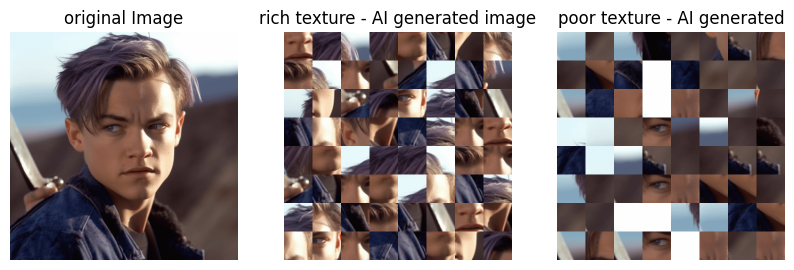

In [14]:
fake_image_path = random.sample(fake_imgs, 1)[0]

rt1, pt1 = smash_n_reconstruct(fake_image_path)

original_image = plt.imread(fake_image_path)

plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(original_image)
plt.title("original Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(rt1)
plt.title("rich texture - AI generated image")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(pt1)
plt.title("poor texture - AI generated")
plt.axis("off")

plt.show()

### Applying high pass filters

In [15]:
rt1 = apply_all_filters(rt1)
pt1 = apply_all_filters(pt1)

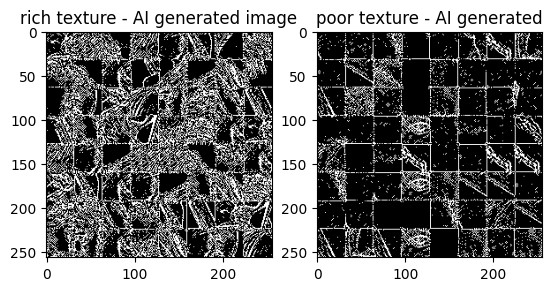

In [16]:
plt.subplot(1, 2, 1)
plt.imshow(rt1, cmap="gray")
plt.title("rich texture - AI generated image")
plt.subplot(1, 2, 2)
plt.imshow(pt1, cmap="gray")
plt.title("poor texture - AI generated")
plt.show()

### Processing Real Image

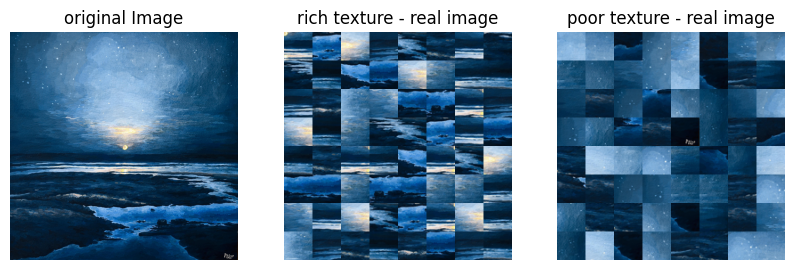

In [20]:
real_image_path = random.sample(real_imgs, 1)[0]

rt2, pt2 = smash_n_reconstruct(real_image_path)

original_image = plt.imread(real_image_path)

plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(original_image)
plt.title("original Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(rt2)
plt.title("rich texture - real image")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(pt2)
plt.title("poor texture - real image")
plt.axis("off")

plt.show()

In [21]:
rt2 = apply_all_filters(rt2)
pt2 = apply_all_filters(pt2)

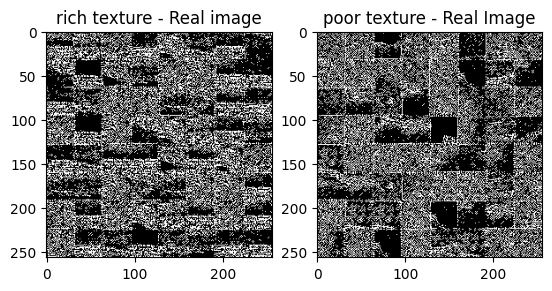

In [22]:
plt.subplot(1, 2, 1)
plt.imshow(rt2, cmap="gray")
plt.title("rich texture - Real image")
plt.subplot(1, 2, 2)
plt.imshow(pt2, cmap="gray")
plt.title("poor texture - Real Image")
plt.show()

In [23]:
from preprocessing.patch_generator import preprocess

In [24]:
frt, fpt, label = preprocess(fake_image_path, 1)

In [25]:
frt.shape, fpt.shape

(TensorShape([256, 256, 1]), TensorShape([256, 256, 1]))

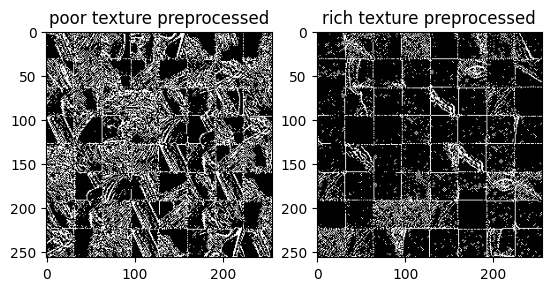

In [26]:
plt.subplot(1, 2, 1)
plt.imshow(frt, cmap="gray")
plt.title("poor texture preprocessed")
plt.subplot(1, 2, 2)
plt.imshow(fpt, cmap="gray")
plt.title("rich texture preprocessed")
plt.show()

### Validate Preprocessing on Dataset

In [ ]:
for img_path in images:
    try:
        preprocess(img_path, -1)
    except Exception as e:
        print(f"Failed processing `{img_path}` with error: {e}")
        os.remove(img_path)